In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
plb.rcParams['font.size'] = 12
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
from scipy.integrate import quad
from scipy.optimize import least_squares
from scipy.optimize import minimize_scalar
import time

In [377]:
#Data output by Radial wave PBC.mph
#R0=1e-4, L=1e-2, h=2e-6, lambda=2e-3, DP=0, Nz=200, mu=1e-3, Nrsolid=5, Nrfluid=32,
q_etaData = (np.loadtxt("waves/q_eta_radial_PBC.txt")).T
etaData = q_etaData[0]/(1e-4)
nuData = q_etaData[1]
qData = q_etaData[2]
print(list(etaData))
print(list(nuData))
print(list(qData))

[0.05, 0.05, 0.05, 0.05, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.35, 0.35, 0.35, 0.35, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.6499999999999999, 0.6499999999999999, 0.6499999999999999, 0.6499999999999999]
[-0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49]
[0.012193437192072363, 0.011964721990345773, 0.01057641496077682, 0.009495783998330174, 0.16161599573130503, 0.17123361746280924, 0.14092189773072367, 0.12696591530178486, 0.4457074116780297, 0.4220823670617111, 0.3718644825543254, 0.3237858082295038, 0.7924846140288627, 0.7195824489310902, 0.6259196359671846, 0.5125433180421426, 1.1374528679530849, 1.0088186889660067, 0.845553913891076, 0.6089678821553534]


In [387]:
#R0=1e-4, L=1e-2, h=2e-6, lambda=2e-3, DP=0, Nz=200, mu=1e-3, Nrsolid=5, Nrfluid=32,
q_etaData2 = (np.loadtxt("waves/q_eta_radial_PBC_with_pressure.txt")).T
etaData2 = q_etaData2[0]/(1e-4)
nuData2 = q_etaData2[1]
qData2 = q_etaData2[2]
print(list(etaData2))
print(list(nuData2))
print(list(qData2))

[0.05, 0.05, 0.05, 0.05, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.35, 0.35, 0.35, 0.35, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.6499999999999999, 0.6499999999999999, 0.6499999999999999, 0.6499999999999999]
[-0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49]
[-0.9779262596656233, -0.9830293408255449, -0.9767824967164009, -0.9770049450323777, -0.6733082879537088, -0.6795243122430804, -0.6641985724336635, -0.6676982758952134, -0.12074663942934961, -0.12578066414248282, -0.14268171438676758, -0.17250469144370847, 0.49515294623089756, 0.4463879336786777, 0.37606482009267045, 0.2778322030422143, 1.0315061335658107, 0.910718600394199, 0.7611382302344626, 0.5317775691684398]


In [398]:
#R0=1e-4, L=1e-2, h=2e-6, lambda=2e-3, DP=0, Nz=200, mu=1e-3, Nrsolid=5, Nrfluid=32,
q_etaDataL = (np.loadtxt("waves/q_eta_longitudinal_PBC.txt")).T
etaDataL = q_etaDataL[0]/(1e-2 / (2*np.pi))
nuDataL = q_etaDataL[1]
qDataL = q_etaDataL[2]
print(list(etaDataL))
print(list(nuDataL))
print(list(qDataL))

[0.049999999999999996, 0.049999999999999996, 0.049999999999999996, 0.049999999999999996, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.19999999999999998, 0.3499999999999999, 0.3499999999999999, 0.3499999999999999, 0.3499999999999999, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.6499999999999999, 0.6499999999999999, 0.6499999999999999, 0.6499999999999999]
[-0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49]
[-0.0003316392106876277, -0.0013777801909255166, -0.0013350530988052967, -7.797064065109619e-05, -0.0001828104758514401, -0.020082109438916012, -0.019284659054650467, 0.001538289350033915, -0.003182253098301952, -0.06168850971836244, -0.05402459466777045, 0.02120781875640224, -0.013626804099323507, -0.12573831489575085, -0.0946796417286403, 0.09629977964375443, -0.03990537422270845, -0.21185701981404406, -0.1258681570886832, 0.2861703926075512]


In [401]:
#R0=1e-4, L=1e-2, h=2e-6, lambda=2e-3, DP=0, Nz=200, mu=1e-3, Nrsolid=5, Nrfluid=32,
q_etaData2L = (np.loadtxt("waves/q_eta_longitudinal_PBC_with_pressure.txt")).T
etaData2L = q_etaData2L[0]/(1e-2 / (2*np.pi))
nuData2L = q_etaData2L[1]
qData2L = q_etaData2L[2]
print(list(etaData2L))
print(list(nuData2L))
print(list(qData2L))

[0.049999999999999996, 0.049999999999999996, 0.049999999999999996, 0.049999999999999996, 0.19499999999999995, 0.19499999999999995, 0.19499999999999995, 0.19499999999999995, 0.33999999999999997, 0.33999999999999997, 0.33999999999999997, 0.33999999999999997, 0.4849999999999999, 0.4849999999999999, 0.4849999999999999, 0.4849999999999999, 0.6299999999999999, 0.6299999999999999, 0.6299999999999999, 0.6299999999999999]
[-0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49, -0.25, 0.0, 0.25, 0.49]
[-1.0012198794304294, -1.0016093629059497, -0.9988208882371788, -0.9931461769879448, -1.014881686957261, -1.0193847178214688, -0.9767652175411818, -0.8919217504153424, -1.0478268564136928, -1.0579953797024704, -0.927041912405808, -0.6730318174668103, -1.1073994538212362, -1.1185254358406642, -0.8472960786705942, -0.3401186236017093, -1.2055432540810824, -1.199580430878859, -0.7318081707976968, 0.0969477089366147]


In [59]:
# Hoop signifies the case where there is a hoop stress coupling the axial displacement to the imposed radius. The axial tension is zero. 
#In all cases: -1 <= nu <= 0.5; 0 < eta < min(1, -1+np.sqrt(1+1/nu))

def rsHoop(xi, eta, nu):
    return 1 + eta * np.cos(2*np.pi*xi)

def dxsdXHoop(xi, eta, nu):
    return np.sqrt(1-2*nu*(eta*np.cos(2*np.pi*xi) + .5*eta**2*np.cos(2*np.pi*xi)**2))

def dvoldXHoop(xi, eta, nu):
    return rsHoop(xi, eta, nu)**2 * dxsdXHoop(xi, eta, nu)
    
def integrandHoop(xi, eta, nu, p, q):
    return rsHoop(xi, eta, nu)**p * dxsdXHoop(xi, eta, nu)**q

def qTildeHoop(DP, eta, nu):
    integral2, error = quad(integrandHoop, 0, 1, args=(eta, nu, -2, 2)) 
    integral3, error = quad(integrandHoop, 0, 1, args=(eta, nu, -4, 1)) 
    return -DP/integral3 - integral2/integral3

#Best to avoid eta = 0 and eta = etaMax. Any values in between should work.
def qMeanHoop(DP, eta, nu):
    integral1, error = quad(integrandHoop, 0, 1, args=(eta, nu,  2, 1)) 
    return qTildeHoop(DP, eta, nu) + integral1

#wave frame mean particle speed. 
#I use functions of qTilde instead of DP to avoid having to calculate the integral for qTilde many times, drastically reducing runtime. 
def spTildeHoop(psiTilde, qTilde, eta, nu):
    if psiTilde > 0:
        spTilde = 0
    else:
        def integrand(xi):
            dvoldX = dvoldXHoop(xi, eta, nu)
            a = (qTilde+dvoldX)
            b = -(2*qTilde+dvoldX)
            c = psiTilde
            RSq = (-b+np.sqrt(b**2 - 4*a*c))/(2*a) #The + root of R^2 as a function of psi, xi
            vxTilde = 2*(1+qTilde/dvoldX)*(1 - RSq) - 1
            return 1/vxTilde
        Tp, error = quad(integrand, 0, 1)
        spTilde = 1/Tp
    return spTilde

#lab frame mean particle speed
def spHoop(psiTilde, qTilde, eta, nu):
    return spTildeHoop(psiTilde, qTilde, eta, nu) + 1

#The value of psiTilde where sp = 0. 
#More precisely, the upper bound of the qPlus integral. 
#If all particles travel right, then psiTilde = qTilde (integrate over all streamlines)
#If all particles travel left, then psiTilde = 0 (integrate over no streamlines)
def psiTildeStarHoop(qTilde, eta, nu):
    integral4, error = quad(integrandHoop, 0, 1, args=(eta, nu, -2, -1)) 
    integral5, error = quad(integrandHoop, 0, 1, args=(eta, nu, -4, -2))
    if qTilde >= -integral4/integral5: #no reflux in this case
        psiTildeStar = qTilde
    elif spHoop(0, qTilde, eta, nu) <= 0:
        psiTildeStar = 0
    else: 
        res = least_squares(spHoop, .1*qTilde, bounds=([.999999*qTilde,0]), args=(qTilde,eta,nu), xtol=1e-8, ftol=1e-8)
        psiTildeStar = (res.x)[0]
    return psiTildeStar

#qPlusMean is the mean flow over streamlines with rightward moving particles.
def qTrioHoop(DP, eta, nu):
    qTilde = qTildeHoop(DP, eta, nu) #This is the ONLY time qTilde is calculated.
    integral1, error = quad(integrandHoop, 0, 1, args=(eta, nu,  2, 1)) 
    qMean = qTilde + integral1
    psiTildeStar = psiTildeStarHoop(qTilde, eta, nu)
    def integrand(xi):
        dvoldX = dvoldXHoop(xi, eta, nu)
        a = (qTilde+dvoldX)
        b = -(2*qTilde+dvoldX)
        c = psiTildeStar
        RSq = (-b+np.sqrt(b**2 - 4*a*c))/(2*a)
        return dvoldX*RSq
    secondTerm, error = quad(integrand, 0, 1)
    qPlusMean = psiTildeStar + secondTerm
    qMinusMean = qMean - qPlusMean
    return [qPlusMean, qMinusMean, qMean]

#In addition to the trio above, this gives a Boolean status of whether there is trapping and reflux (a negative value of sp(psiTilde))
def qDataHoop(DP, eta, nu):
    qTilde = qTildeHoop(DP, eta, nu) #This is the ONLY time qTilde is calculated.
    integral1, error = quad(integrandHoop, 0, 1, args=(eta, nu,  2, 1)) 
    qMean = qTilde + integral1
    psiTildeStar = psiTildeStarHoop(qTilde, eta, nu)
    def integrand(xi):
        dvoldX = dvoldXHoop(xi, eta, nu)
        a = (qTilde+dvoldX)
        b = -(2*qTilde+dvoldX)
        c = psiTildeStar
        RSq = (-b+np.sqrt(b**2 - 4*a*c))/(2*a)
        return dvoldX*RSq
    secondTerm, error = quad(integrand, 0, 1)
    qPlusMean = psiTildeStar + secondTerm
    qMinusMean = qMean - qPlusMean
    numerator, error = quad(integrandHoop, 0, 1, args=(eta, nu, -2, -1))
    denominator, error = quad(integrandHoop, 0, 1, args=(eta, nu, -4, -2))
    trappingStat = False
    refluxStat = False
    minLocation = (minimize_scalar(lambda xi: -.5*dvoldXHoop(xi, eta, nu), bounds=(0, 1), method="bounded", options={"xatol":1e-9})).x
    if qTilde >= min(-.5*dvoldXHoop(minLocation, eta, nu),-.5*dvoldXHoop(0, eta, nu)):
        trappingStat = True
    if qTilde < (-numerator/denominator):
        refluxStat = True
    return [qPlusMean, qMinusMean, qMean, trappingStat, refluxStat]

In [261]:
def dxsdXTension(xi, eta, nu):
    return 1 + eta * np.cos(2*np.pi*xi)

def rsTension(xi, eta, nu):
    return np.sqrt(1-2*nu*(eta*np.cos(2*np.pi*xi) + .5*eta**2*np.cos(2*np.pi*xi)**2))

def dvoldXTension(xi, eta, nu):
    return rsTension(xi, eta, nu)**2 * dxsdXTension(xi, eta, nu)
    
def integrandTension(xi, eta, nu, p, q):
    return rsTension(xi, eta, nu)**p * dxsdXTension(xi, eta, nu)**q

def qTildeTension(DP, eta, nu):
    integral2, error = quad(integrandTension, 0, 1, args=(eta, nu, -2, 2)) 
    integral3, error = quad(integrandTension, 0, 1, args=(eta, nu, -4, 1)) 
    return -DP/integral3 - integral2/integral3

#Best to avoid eta = 0 and eta = etaMax. Any values in between should work.
def qMeanTension(DP, eta, nu):
    integral1, error = quad(integrandTension, 0, 1, args=(eta, nu,  2, 1)) 
    return qTildeTension(DP, eta, nu) + integral1

#wave frame mean particle speed. 
#I use functions of qTilde instead of DP to avoid having to calculate the integral for qTilde many times, drastically reducing runtime. 
def spTildeTension(psiTilde, qTilde, eta, nu):
    if psiTilde > 0:
        spTilde = 0
    else:
        def integrand(xi):
            dvoldX = dvoldXTension(xi, eta, nu)
            a = (qTilde+dvoldX)
            b = -(2*qTilde+dvoldX)
            c = psiTilde
            RSq = (-b+np.sqrt(b**2 - 4*a*c))/(2*a) #The + root of R^2 as a function of psi, xi
            vxTilde = 2*(1+qTilde/dvoldX)*(1 - RSq) - 1
            return 1/vxTilde
        Tp, error = quad(integrand, 0, 1)
        spTilde = 1/Tp
    return spTilde

#lab frame mean particle speed
def spTension(psiTilde, qTilde, eta, nu):
    return spTildeTension(psiTilde, qTilde, eta, nu) + 1

#The value of psiTilde where sp = 0. 
#More precisely, the upper bound of the qPlus integral. 
#If all particles travel right, then psiTilde = qTilde (integrate over all streamlines)
#If all particles travel left, then psiTilde = 0 (integrate over no streamlines)
def psiTildeStarTension(qTilde, eta, nu):
    integral4, error = quad(integrandTension, 0, 1, args=(eta, nu, -2, -1)) 
    integral5, error = quad(integrandTension, 0, 1, args=(eta, nu, -4, -2))
    if qTilde >= -integral4/integral5: #no reflux in this case
        psiTildeStar = qTilde
    elif spTension(0, qTilde, eta, nu) <= 0:
        psiTildeStar = 0
    else: 
        res = least_squares(spTension, .1*qTilde, bounds=([.999999*qTilde,0]), args=(qTilde,eta,nu), xtol=1e-8, ftol=1e-8)
        psiTildeStar = (res.x)[0]
    return psiTildeStar

#qPlusMean is the mean flow over streamlines with rightward moving particles.
def qTrioTension(DP, eta, nu):
    qTilde = qTildeTension(DP, eta, nu) #This is the ONLY time qTilde is calculated.
    integral1, error = quad(integrandTension, 0, 1, args=(eta, nu,  2, 1)) 
    qMean = qTilde + integral1
    psiTildeStar = psiTildeStarTension(qTilde, eta, nu)
    def integrand(xi):
        dvoldX = dvoldXTension(xi, eta, nu)
        a = (qTilde+dvoldX)
        b = -(2*qTilde+dvoldX)
        c = psiTildeStar
        RSq = (-b+np.sqrt(b**2 - 4*a*c))/(2*a)
        return dvoldX*RSq
    secondTerm, error = quad(integrand, 0, 1)
    qPlusMean = psiTildeStar + secondTerm
    qMinusMean = qMean - qPlusMean
    return [qPlusMean, qMinusMean, qMean]

#In addition to the trio above, this gives a Boolean status of whether there is trapping and reflux (a negative value of sp(psiTilde))
def qDataTension(DP, eta, nu):
    qTilde = qTildeTension(DP, eta, nu) #This is the ONLY time qTilde is calculated.
    integral1, error = quad(integrandTension, 0, 1, args=(eta, nu,  2, 1)) 
    qMean = qTilde + integral1
    psiTildeStar = psiTildeStarTension(qTilde, eta, nu)
    def integrand(xi):
        dvoldX = dvoldXTension(xi, eta, nu)
        a = (qTilde+dvoldX)
        b = -(2*qTilde+dvoldX)
        c = psiTildeStar
        RSq = (-b+np.sqrt(b**2 - 4*a*c))/(2*a)
        return dvoldX*RSq
    secondTerm, error = quad(integrand, 0, 1)
    qPlusMean = psiTildeStar + secondTerm
    qMinusMean = qMean - qPlusMean
    numerator, error = quad(integrandTension, 0, 1, args=(eta, nu, -2, -1))
    denominator, error = quad(integrandTension, 0, 1, args=(eta, nu, -4, -2))
    trappingStat = False
    refluxStat = False
    minLocation = (minimize_scalar(lambda xi: -.5*dvoldXTension(xi, eta, nu), bounds=(0, 1), method="bounded", options={"xatol":1e-9})).x
    if qTilde >= min(-.5*dvoldXTension(minLocation, eta, nu),-.5*dvoldXTension(0, eta, nu)):
        trappingStat = True
    if qTilde < (-numerator/denominator):
        refluxStat = True
    return [qPlusMean, qMinusMean, qMean, trappingStat, refluxStat]

In [ ]:
# These functions are unnecessary except for plotting the velocity field
def drsXHoop(xi, eta, nu):
    return -2 * np.pi * eta * np.sin(2*np.pi*xi)

def d2xsdX2Hoop(xi, eta, nu):
    return  (2*np.pi*nu*eta*np.sin(2*np.pi*xi) + 2*np.pi*nu*eta**2*np.sin(2*np.pi*xi)*np.cos(2*np.pi*xi))/ dxsdXHoop(xi, eta, nu)

def d2voldX2Hoop(xi, eta, nu): 
    return 2*rsHoop(xi,eta,nu)*drsXHoop(xi, eta, nu) * dxsdXHoop(xi, eta, nu) + rsHoop(xi, eta, nu)**2 * d2xsdX2Hoop(xi, eta, nu)

def vxTildeHoop(R, xi, DP, eta, nu):
    return 2*(1+qTildeHoop(DP, eta, nu)/dvoldXHoop(xi, eta, nu))*(1 - R**2) - 1

def vRTildeHoop(R, xi, DP, eta, nu):
    return  - d2voldX2Hoop(xi, eta, nu) / dvoldXHoop(xi, eta, nu) * R/2 * (1 - R**2)

In [217]:
DP = 0
eta_min, eta_max = 0.0001, .9999
nu_min,  nu_max  = -1.0, 0.5
lenList = 100

etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
nuList  = np.linspace(-1, .5,  lenList, endpoint=True)

qPlusMeanMatrix = np.zeros((lenList,lenList), dtype=float)
qMinusMeanMatrix = np.zeros((lenList,lenList), dtype=float)
qMeanMatrix = np.zeros((lenList,lenList), dtype=float)
trappingStatMatrix = np.zeros((lenList,lenList), dtype=float)
refluxStatMatrix = np.zeros((lenList,lenList), dtype=float)

t0 = time.time()
for j, nu in enumerate(nuList):
    for i, eta in enumerate(etaList):
        if nu > 0 and eta > -1 + np.sqrt(1+1/nu):
            continue
        qPlusMean, qMinusMean, qMean, trappingStat, refluxStat = qDataHoop(DP, eta, nu)
        qPlusMeanMatrix[j,i] = qPlusMean
        qMinusMeanMatrix[j,i] = qMinusMean
        qMeanMatrix[j,i] = qMean
        trappingStatMatrix[j,i] = trappingStat
        refluxStatMatrix[j,i] = refluxStat

t1 = time.time()
print(t1-t0)

/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested

573.3320910930634


In [224]:
DP = 1
eta_min, eta_max = 0.0001, .9999
nu_min,  nu_max  = -1.0, 0.5
lenList = 100

etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
nuList  = np.linspace(-1, .5,  lenList, endpoint=True)

qPlusMeanMatrix2 = np.zeros((lenList,lenList), dtype=float)
qMinusMeanMatrix2 = np.zeros((lenList,lenList), dtype=float)
qMeanMatrix2 = np.zeros((lenList,lenList), dtype=float)
trappingStatMatrix2 = np.zeros((lenList,lenList), dtype=float)
refluxStatMatrix2 = np.zeros((lenList,lenList), dtype=float)

t0 = time.time()
for j, nu in enumerate(nuList):
    for i, eta in enumerate(etaList):
        if nu > 0 and eta > -1 + np.sqrt(1+1/nu):
            continue
        qPlusMean, qMinusMean, qMean, trappingStat, refluxStat = qDataHoop(DP, eta, nu)
        qPlusMeanMatrix2[j,i] = qPlusMean
        qMinusMeanMatrix2[j,i] = qMinusMean
        qMeanMatrix2[j,i] = qMean
        trappingStatMatrix2[j,i] = trappingStat
        refluxStatMatrix2[j,i] = refluxStat

t1 = time.time()
print(t1-t0)

/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested

627.1163759231567


In [557]:
#Now recreate the Shapiro plot and compare with nu = 0.5

#qRat = <q(DP)>/<q(0)>

nu = 0
eta_min, eta_max = 0.0001, .9999
qRat_min,  qRat_max  = 0, 1.2
lenList = 200

etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
qRatList  = np.linspace(qRat_min, qRat_max,  lenList, endpoint=True)

qPlusMeanMatrixS = np.zeros((lenList,lenList), dtype=float)
qMinusMeanMatrixS = np.zeros((lenList,lenList), dtype=float)
qMeanMatrixS = np.zeros((lenList,lenList), dtype=float)
trappingStatMatrixS = np.zeros((lenList,lenList), dtype=float)
refluxStatMatrixS = np.zeros((lenList,lenList), dtype=float)

t0 = time.time()
for i, eta in enumerate(etaList):
    integral1, error = quad(integrandHoop, 0, 1, args=(eta, nu,  2, 1)) 
    integral2, error = quad(integrandHoop, 0, 1, args=(eta, nu, -2, 2)) 
    integral3, error = quad(integrandHoop, 0, 1, args=(eta, nu, -4, 1)) 
    prefactor = integral3*integral1 - integral2
    for j, qRat in enumerate(qRatList):
        DP = prefactor * (1 - qRat)
        if nu > 0 and eta > -1 + np.sqrt(1+1/nu):
            continue
        qPlusMean, qMinusMean, qMean, trappingStat, refluxStat = qDataHoop(DP, eta, nu)
        qPlusMeanMatrixS[j,i] = qPlusMean
        qMinusMeanMatrixS[j,i] = qMinusMean
        qMeanMatrixS[j,i] = qMean
        trappingStatMatrixS[j,i] = trappingStat
        refluxStatMatrixS[j,i] = refluxStat

t1 = time.time()
print(t1-t0)

/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested

1774.1202232837677


In [558]:
#Now recreate the Shapiro plot and compare with nu = 0.5

#qRat = <q(DP)>/<q(0)>

nu = 0.5
eta_min, eta_max = 0.0001, .9999
qRat_min,  qRat_max  = 0, 1.2
lenList = 200

etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
qRatList  = np.linspace(qRat_min, qRat_max,  lenList, endpoint=True)

qPlusMeanMatrixS2 = np.zeros((lenList,lenList), dtype=float)
qMinusMeanMatrixS2 = np.zeros((lenList,lenList), dtype=float)
qMeanMatrixS2 = np.zeros((lenList,lenList), dtype=float)
trappingStatMatrixS2 = np.zeros((lenList,lenList), dtype=float)
refluxStatMatrixS2 = np.zeros((lenList,lenList), dtype=float)

t0 = time.time()
for i, eta in enumerate(etaList):
    integral1, error = quad(integrandHoop, 0, 1, args=(eta, nu,  2, 1)) 
    integral2, error = quad(integrandHoop, 0, 1, args=(eta, nu, -2, 2)) 
    integral3, error = quad(integrandHoop, 0, 1, args=(eta, nu, -4, 1)) 
    prefactor = integral3*integral1 - integral2
    for j, qRat in enumerate(qRatList):
        DP = prefactor * (1 - qRat)
        if nu > 0 and eta > -1 + np.sqrt(1+1/nu):
            continue
        qPlusMean, qMinusMean, qMean, trappingStat, refluxStat = qDataHoop(DP, eta, nu)
        qPlusMeanMatrixS2[j,i] = qPlusMean
        qMinusMeanMatrixS2[j,i] = qMinusMean
        qMeanMatrixS2[j,i] = qMean
        trappingStatMatrixS2[j,i] = trappingStat
        refluxStatMatrixS2[j,i] = refluxStat

t1 = time.time()
print(t1-t0)

/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/1885171008.py:40: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested

947.6657149791718


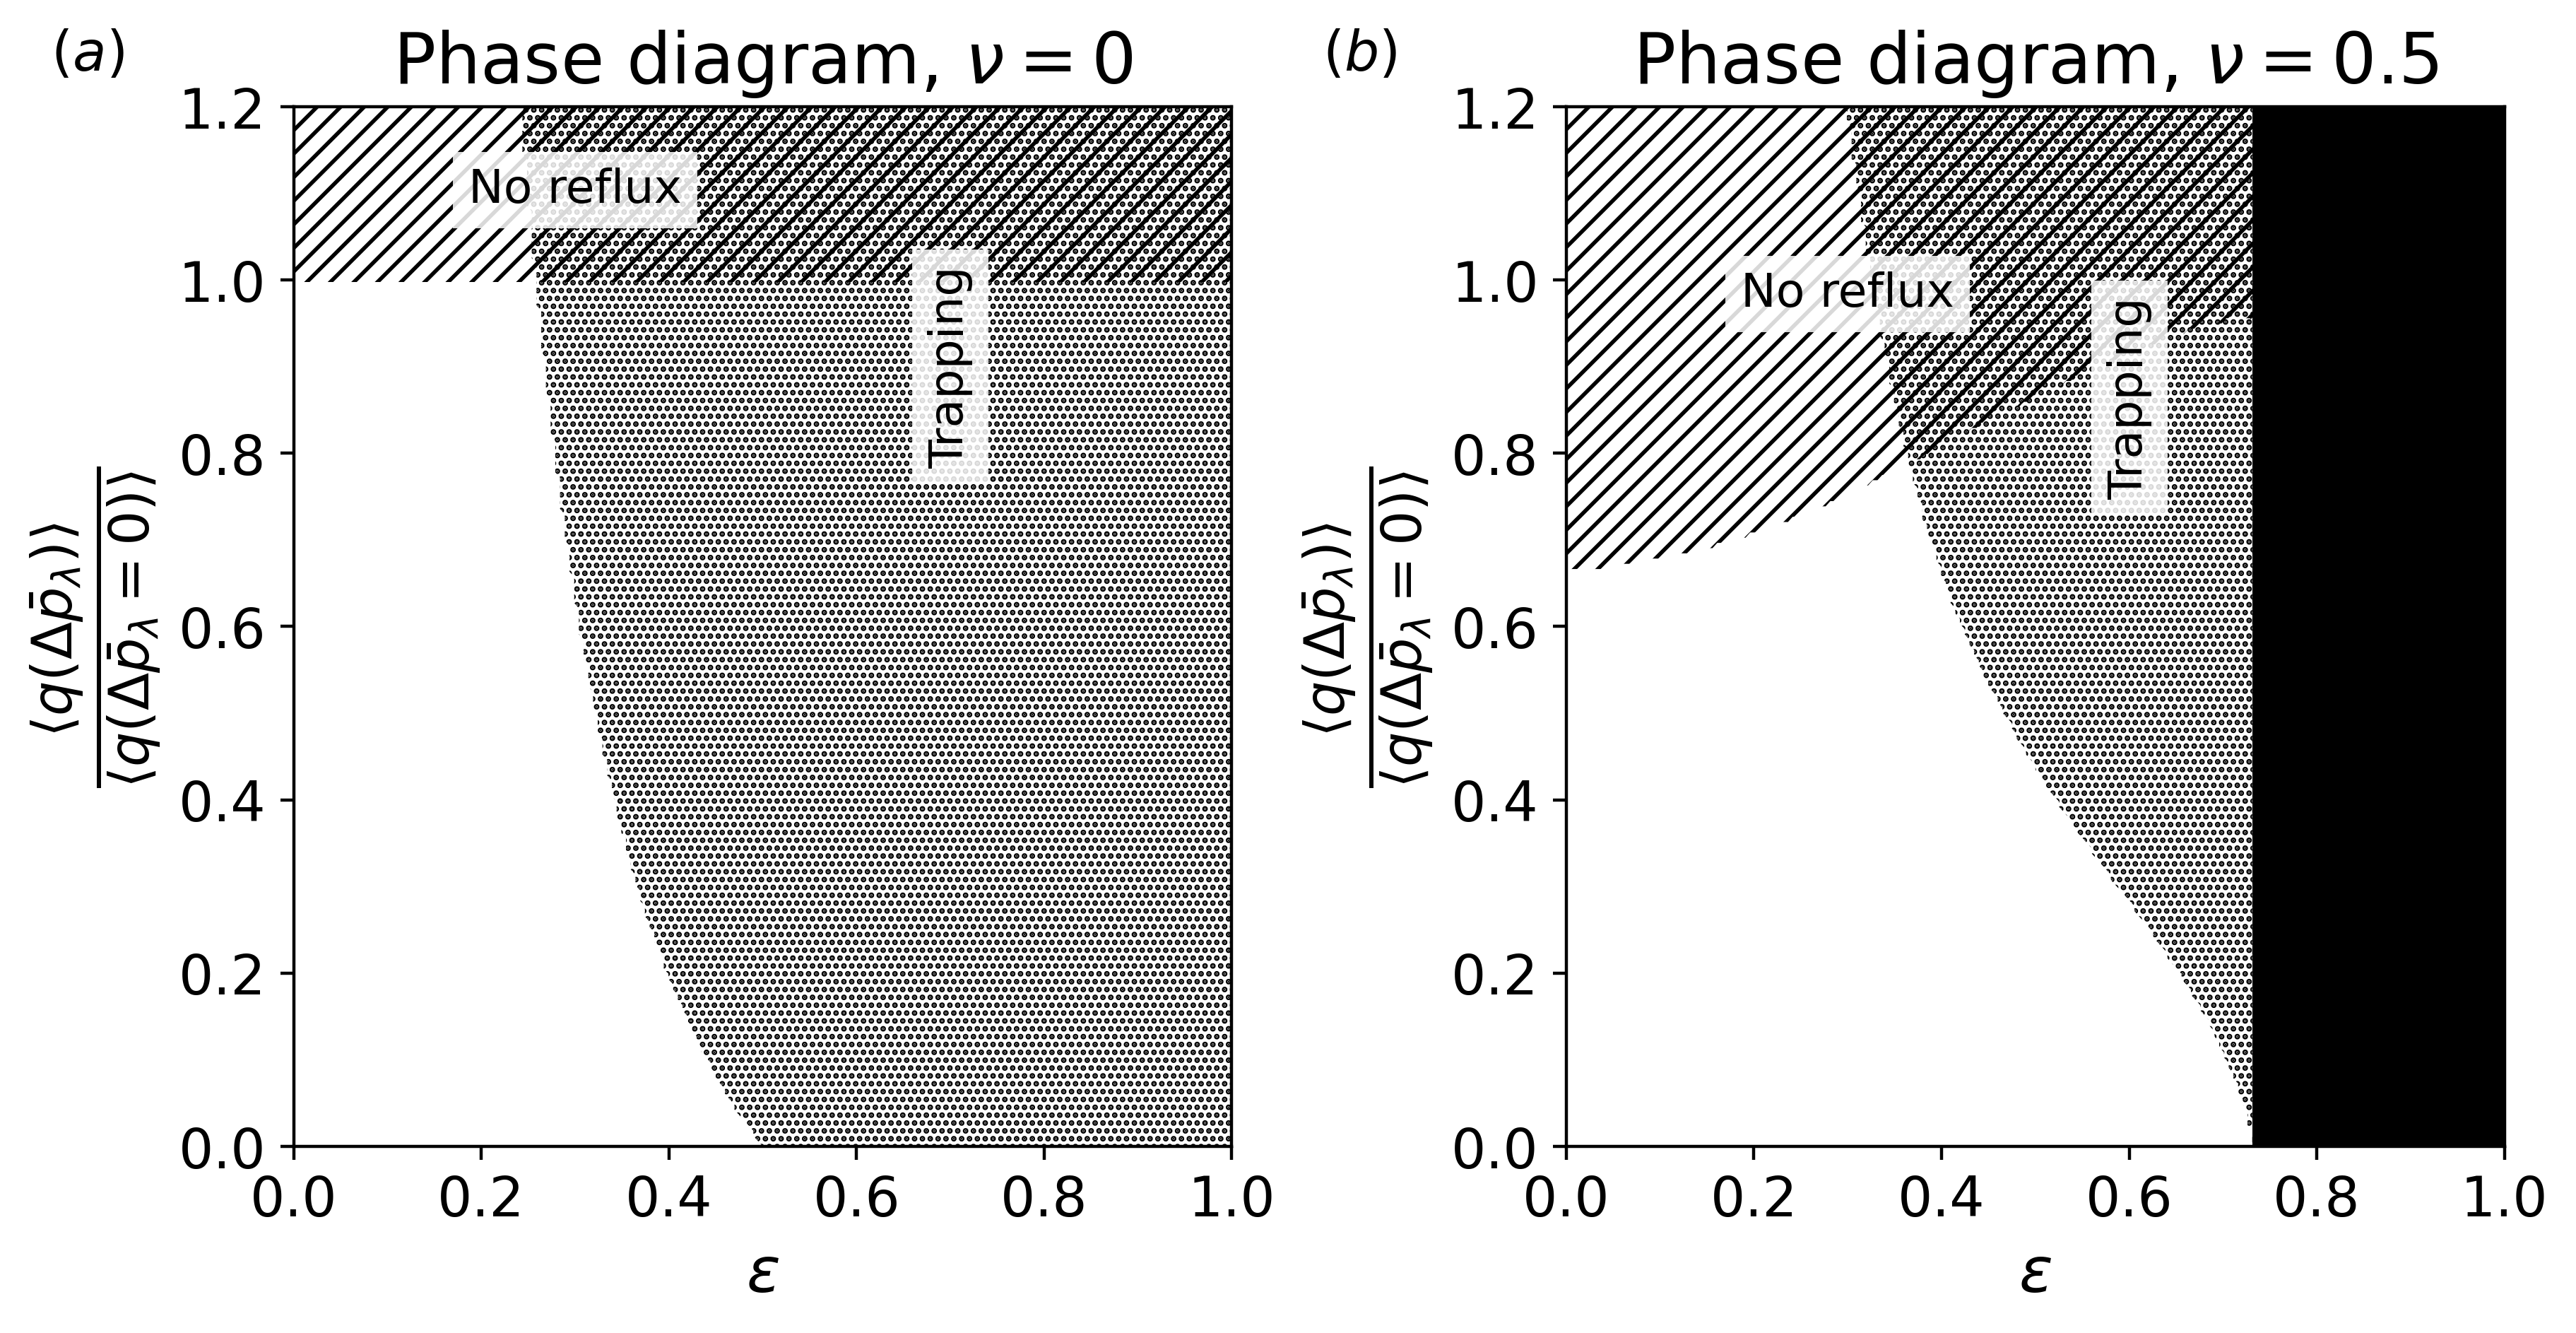

In [562]:
#I suppose I didnt need to run those time-consuming simulations since I'm not using the q's. 
# Just want to reconstruct the phase portraits.
fig, axs = plt.subplots(1,2,figsize=(9, 4.6), dpi=400, constrained_layout=True)

letters = [r'$(a)$',r'$(b)$']
titles = [r"Phase diagram, $\nu = 0$", r"Phase diagram, $\nu = 0.5$"]


#maxData = np.nanmax(data) #around 2.5, this highlights that unphysical region near nu=-1, eta=1 
maxData = 1.5 #This is the normal max value, that of nu=0
fs = 14

EE, NN = np.meshgrid(etaList, qRatList)
invalid_region = (.5 > 1/(EE**2+2*EE)).astype(float)
axs[1].contourf(EE, NN, invalid_region, levels=[0.5, 1.5], colors='black', zorder=100)

#Hatch the zero reflux region
axs[0].contourf(EE, NN, 1-(refluxStatMatrixS), levels=[0.5, 1.5], colors='none', hatches=['////'], zorder=10)
# and the trapping region
axs[0].contourf(EE, NN, (trappingStatMatrixS), levels=[0.5, 1.5], colors='none', hatches=['......'], zorder=10)
#Hatch the zero reflux region
axs[1].contourf(EE, NN, 1-(refluxStatMatrixS2), levels=[0.5, 1.5], colors='none', hatches=['////'], zorder=10)
# and the trapping region
axs[1].contourf(EE, NN, (trappingStatMatrixS2), levels=[0.5, 1.5], colors='none', hatches=['......'], zorder=10)

for i in range(2):
    ax = axs[i]
    ax.set_xlabel(r"$\epsilon$", fontsize=16)
    ax.set_ylabel(r"$\frac{\langle q(\Delta \bar{p}_\lambda) \rangle }{ \langle q(\Delta \bar{p}_\lambda = 0)\rangle}$", fontsize=20)
    ax.set_title(titles[i], fontsize=18)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1.2)
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.text(-.22, 1.05, letters[i], fontsize=fs, ha='center', va='center', transform=ax.transAxes)

fs=12
ax=axs[0]
#ax.text(.175, .4, 'Reflux \n only', color='black',fontsize=fs, ha='center', va='center', transform=ax.transAxes,zorder=100)
#ax.text(.7, .4, 'Reflux \n and trapping', color='black',fontsize=fs, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)
#ax.text(.125, .92, 'Neither', color='black',fontsize=fs, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)
#ax.text(.7, .92, 'Trapping only', color='black',fontsize=fs, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)

ax.text(.7, .75, 'Trapping', color='black',fontsize=fs, rotation=90, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)
ax.text(.3, .92, 'No reflux', color='black',fontsize=fs, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)

ax=axs[1]
#ax.text(.25, .25, 'Reflux \n only', color='black',fontsize=fs, ha='center', va='center', transform=ax.transAxes,zorder=100)
#ax.text(.575, .575, 'Reflux \n and \n trapping', color='black',fontsize=fs, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)
#ax.text(.16, .8, 'Neither', color='black',fontsize=fs, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)
#ax.text(.54, .89, 'Trapping \n only', color='black',fontsize=fs, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)
ax.text(.6, .72, 'Trapping', color='black',fontsize=fs, rotation=90, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)
ax.text(.3, .82, 'No reflux', color='black',fontsize=fs, bbox=dict(facecolor='white', edgecolor='none', alpha=.85), ha='center', va='center', transform=ax.transAxes,zorder=100)



plt.show()

fig.savefig('qPhaseDiagramRadialwithText.pdf', format='pdf', bbox_inches='tight')
fig.savefig('qPhaseDiagramRadialwithText.svg', format='svg', bbox_inches='tight')

In [273]:
DP = 0
eta_min, eta_max = 0.0001, .9999
nu_min,  nu_max  = -1.0, 0.5
lenList = 100

etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
nuList  = np.linspace(-1, .5,  lenList, endpoint=True)

qPlusMeanMatrixL = np.zeros((lenList,lenList), dtype=float)
qMinusMeanMatrixL = np.zeros((lenList,lenList), dtype=float)
qMeanMatrixL = np.zeros((lenList,lenList), dtype=float)
trappingStatMatrixL = np.zeros((lenList,lenList), dtype=float)
refluxStatMatrixL = np.zeros((lenList,lenList), dtype=float)

t0 = time.time()
for j, nu in enumerate(nuList):
    for i, eta in enumerate(etaList):
        if nu > 0 and eta > -1 + np.sqrt(1+1/nu):
            continue
        qPlusMean, qMinusMean, qMean, trappingStat, refluxStat = qDataTension(DP, eta, nu)
        qPlusMeanMatrixL[j,i] = qPlusMean
        qMinusMeanMatrixL[j,i] = qMinusMean
        qMeanMatrixL[j,i] = qMean
        trappingStatMatrixL[j,i] = trappingStat
        refluxStatMatrixL[j,i] = refluxStat

t1 = time.time()
print(t1-t0)

/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/3962776198.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/3962776198.py:37: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/3962776198.py:37: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested

333.1227159500122


In [275]:
DP = 1
eta_min, eta_max = 0.0001, .9999
nu_min,  nu_max  = -1.0, 0.5
lenList = 100

etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
nuList  = np.linspace(-1, .5,  lenList, endpoint=True)

qPlusMeanMatrix2L = np.zeros((lenList,lenList), dtype=float)
qMinusMeanMatrix2L = np.zeros((lenList,lenList), dtype=float)
qMeanMatrix2L = np.zeros((lenList,lenList), dtype=float)
trappingStatMatrix2L = np.zeros((lenList,lenList), dtype=float)
refluxStatMatrix2L = np.zeros((lenList,lenList), dtype=float)

t0 = time.time()
for j, nu in enumerate(nuList):
    for i, eta in enumerate(etaList):
        if nu > 0 and eta > -1 + np.sqrt(1+1/nu):
            continue
        qPlusMean, qMinusMean, qMean, trappingStat, refluxStat = qDataTension(DP, eta, nu)
        qPlusMeanMatrix2L[j,i] = qPlusMean
        qMinusMeanMatrix2L[j,i] = qMinusMean
        qMeanMatrix2L[j,i] = qMean
        trappingStatMatrix2L[j,i] = trappingStat
        refluxStatMatrix2L[j,i] = refluxStat

t1 = time.time()
print(t1-t0)

/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/3962776198.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/3962776198.py:37: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Tp, error = quad(integrand, 0, 1)
/var/folders/l2/5ls67js12gvc3dd5z60rccl40000gn/T/ipykernel_15047/3962776198.py:37: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested

158.44973516464233


In [282]:
def integrandHoop(X, eta, nu, p, q):
    rs = 1 - eta * np.cos(2*np.pi*X)
    epsPHIPHI = (rs-1) + .5 * (rs-1)**2
    dxsdX = np.sqrt(1-2*nu*epsPHIPHI)
    return rs**p * dxsdX**q

def integrandTension(X, eta, nu, p, q):
    dxsdX = 1 - eta * np.cos(2*np.pi*X)
    epsXX = (dxsdX-1) + .5 * (dxsdX-1)**2
    rs = np.sqrt(1-2*nu*epsXX)
    return rs**p * dxsdX**q

#Convention DP = p2-p1, so interesting cases are positive DP.
def meanFlowHoop(eta, nu, DP):
    integral1, error = quad(integrandHoop, 0, 1, args=(eta, nu,  2, 1)) 
    integral2, error = quad(integrandHoop, 0, 1, args=(eta, nu, -2, 2)) 
    integral3, error = quad(integrandHoop, 0, 1, args=(eta, nu, -4, 1)) 
    return -DP/integral3 + integral1 - integral2/integral3

def meanFlowTension(eta, nu, DP):
    integral1, error = quad(integrandTension, 0, 1, args=(eta, nu,  2, 1)) 
    integral2, error = quad(integrandTension, 0, 1, args=(eta, nu, -2, 2)) 
    integral3, error = quad(integrandTension, 0, 1, args=(eta, nu, -4, 1)) 
    return -DP/integral3 + integral1 - integral2/integral3

    #Convention DP = p2-p1, so interesting cases are positive DP.
def lengthHoop(eta, nu, DP):
    integral1, error = quad(integrandHoop, 0, 1, args=(eta, nu,  2, 1))
    return integral1

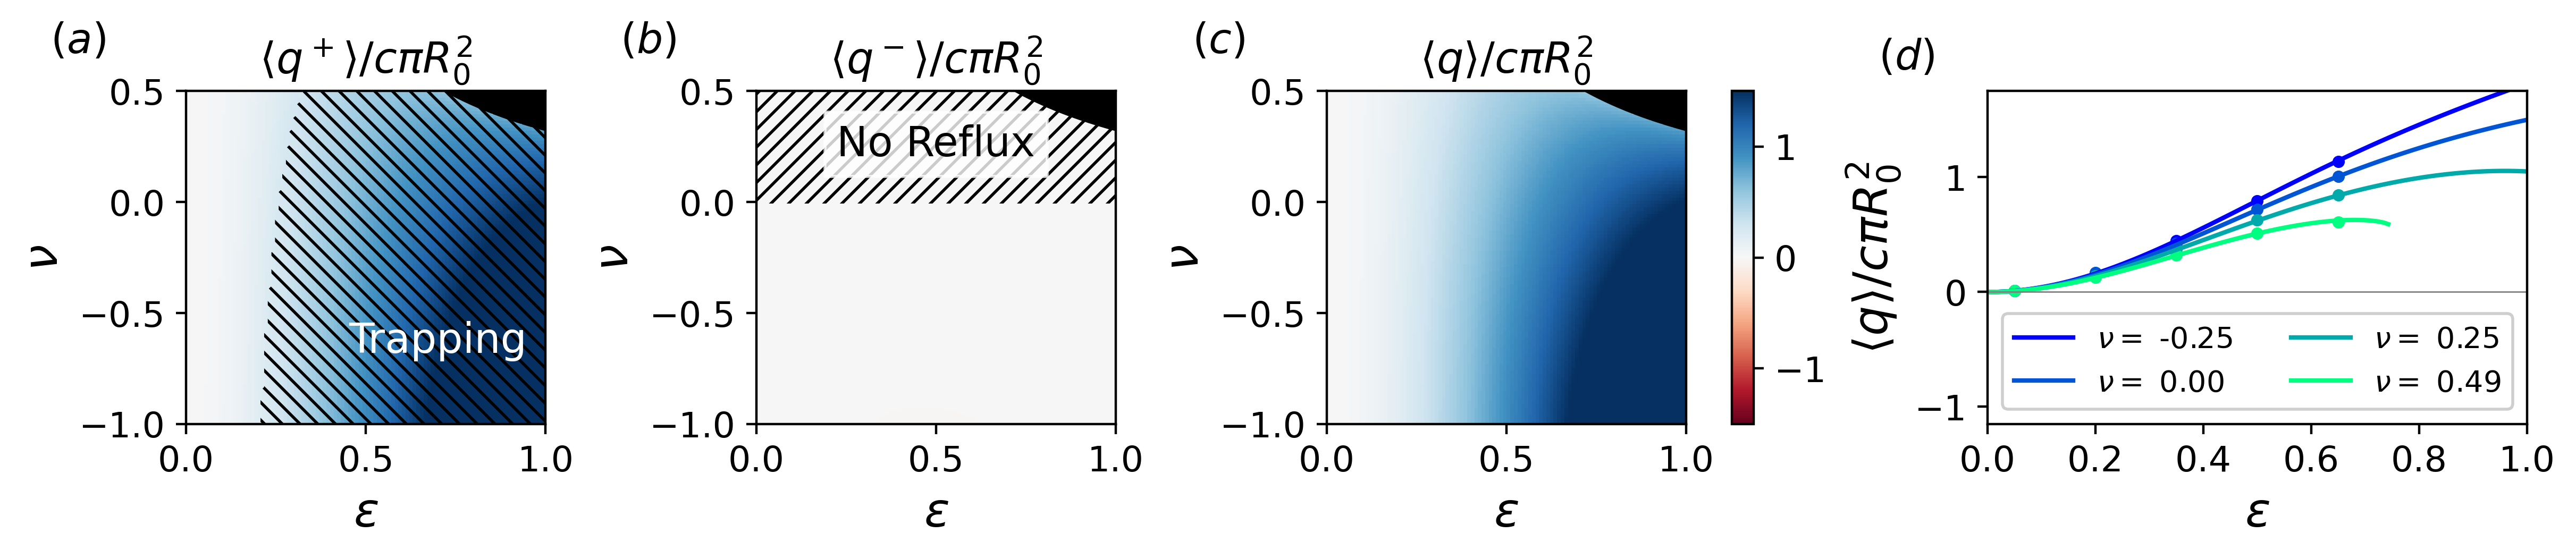

In [553]:
DP = 0
eta_min, eta_max = 0.0001, .9999
nu_min,  nu_max  = -1.0, 0.5
lenList = 100
etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
nuList  = np.linspace(-1, .5,  lenList, endpoint=True)


fig, axs = plt.subplots(1,5,figsize=(12, 2.5), dpi=400, constrained_layout=True, gridspec_kw={'width_ratios': [1, 1, 1, 0.06, 1.5]} )

letters = [r'$(a)$',r'$(b)$',r'$(c)$']
titles = [r"$\langle q^+ \rangle / c\pi R_0^2$", r"$\langle q^- \rangle / c\pi R_0^2$", r"$\langle q \rangle / c\pi R_0^2$"]
data = [qPlusMeanMatrix, qMinusMeanMatrix, qMeanMatrix]

EE, NN = np.meshgrid(etaList, nuList)
invalid_region = (NN > 1/(EE**2+2*EE)).astype(float)
#maxData = np.nanmax(data) #around 2.5, this highlights that unphysical region near nu=-1, eta=1 
maxData = 1.5 #This is the normal max value, that of nu=0
fs = 12

for i in range(3):
    ax = axs[i]
    Z = data[i]
    im = ax.imshow(Z,
                   origin="lower",
                   cmap="RdBu",
                   norm=mpl.colors.TwoSlopeNorm(vmin=-maxData, vcenter=0.0, vmax=maxData),
                   extent=[0, 1, nu_min, nu_max],
                   aspect="auto",
                   )
    ax.set_xlabel(r"$\epsilon$", fontsize=16)
    ax.set_ylabel(r"$\nu$", fontsize=16)
    ax.set_title(titles[i])
    ax.set_xlim(0,1)
    ax.set_ylim(-1,.5)
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.text(-.3, 1.15, letters[i], fontsize=14, ha='center', va='center', transform=ax.transAxes)
    
    #Color the invalid region white
    ax.contourf(EE, NN, invalid_region, levels=[0.5, 1.5], colors='black', zorder=100)
    ax.plot(etaList, 1/(etaList*(etaList+2)),color='black',linewidth=2,linestyle='-', zorder=1000)

#Hatch the zero reflux region
axs[1].contourf(EE, NN, 1-(refluxStatMatrix), levels=[0.5, 1.5], colors='none', hatches=['////'], zorder=10)
# and the trapping region
axs[0].contourf(EE, NN, (trappingStatMatrix), levels=[0.5, 1.5], colors='none', hatches=['\\\\\\\\'], zorder=10)

cbar = fig.colorbar(im, cax=axs[3])
#fig.colorbar(im, cax=axs[3])
cbar.ax.tick_params(labelsize=fs)

ax=axs[0]
ax.text(.7, .25, r'Trapping', color='white',fontsize=14, ha='center', va='center', transform=ax.transAxes,zorder=100)
ax=axs[1]
ax.text(.5, .84, r'No Reflux', color='black',fontsize=14, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white', alpha=.8), transform=ax.transAxes, zorder=100)

ax=axs[4]
nuListCOMSOL = [-.25,0,0.25,.49]

cmap = plt.get_cmap('winter')
size = 10

for i in range(len(nuListCOMSOL)):
    nu = nuListCOMSOL[i]
    if nu > 0:
        etaMax = min(.999, np.sqrt(1+1/nu) - 1.001)
    else:
        etaMax = .999
    etaListCorrected = np.linspace(0,etaMax,len(etaList))
    flowList = np.zeros(lenList)
    for j in range(len(etaListCorrected)):
        eta = etaListCorrected[j]
        flowList[j] = qMeanHoop(DP, eta, nu)
    color = cmap(i / (len(nuListCOMSOL) - 1))
    ax.plot(etaListCorrected, flowList, color=color, label=r'$\nu = $ %1.2f' %nu)

    for k in range(len(nuData)):
        if (nuData[k] - nu)**2 < 1e-6:
            ax.scatter(etaData[k],qData[k], color=color, s=size)

ax.set_xlabel(r'$\epsilon$',fontsize=16)
ax.set_ylabel(r'$\langle q \rangle / c\pi R_0^2$',fontsize=16)
ax.set_xlim(0,1)
ax.set_ylim(-1.15,1.75)
ax.legend(ncols=2,fontsize=10,framealpha=0.95)
ax.text(-.15, 1.1, r'$(d)$', fontsize=14, ha='center', va='center', transform=ax.transAxes)
ax.axhline(y=0, color='gray', linestyle='-',linewidth=.5)

plt.show()

fig.savefig('qPlusRadialZeroPressureWithCOMSOL.pdf', format='pdf', bbox_inches='tight')
fig.savefig('qPlusRadialZeroPressureWithCOMSOL.svg', format='svg', bbox_inches='tight')


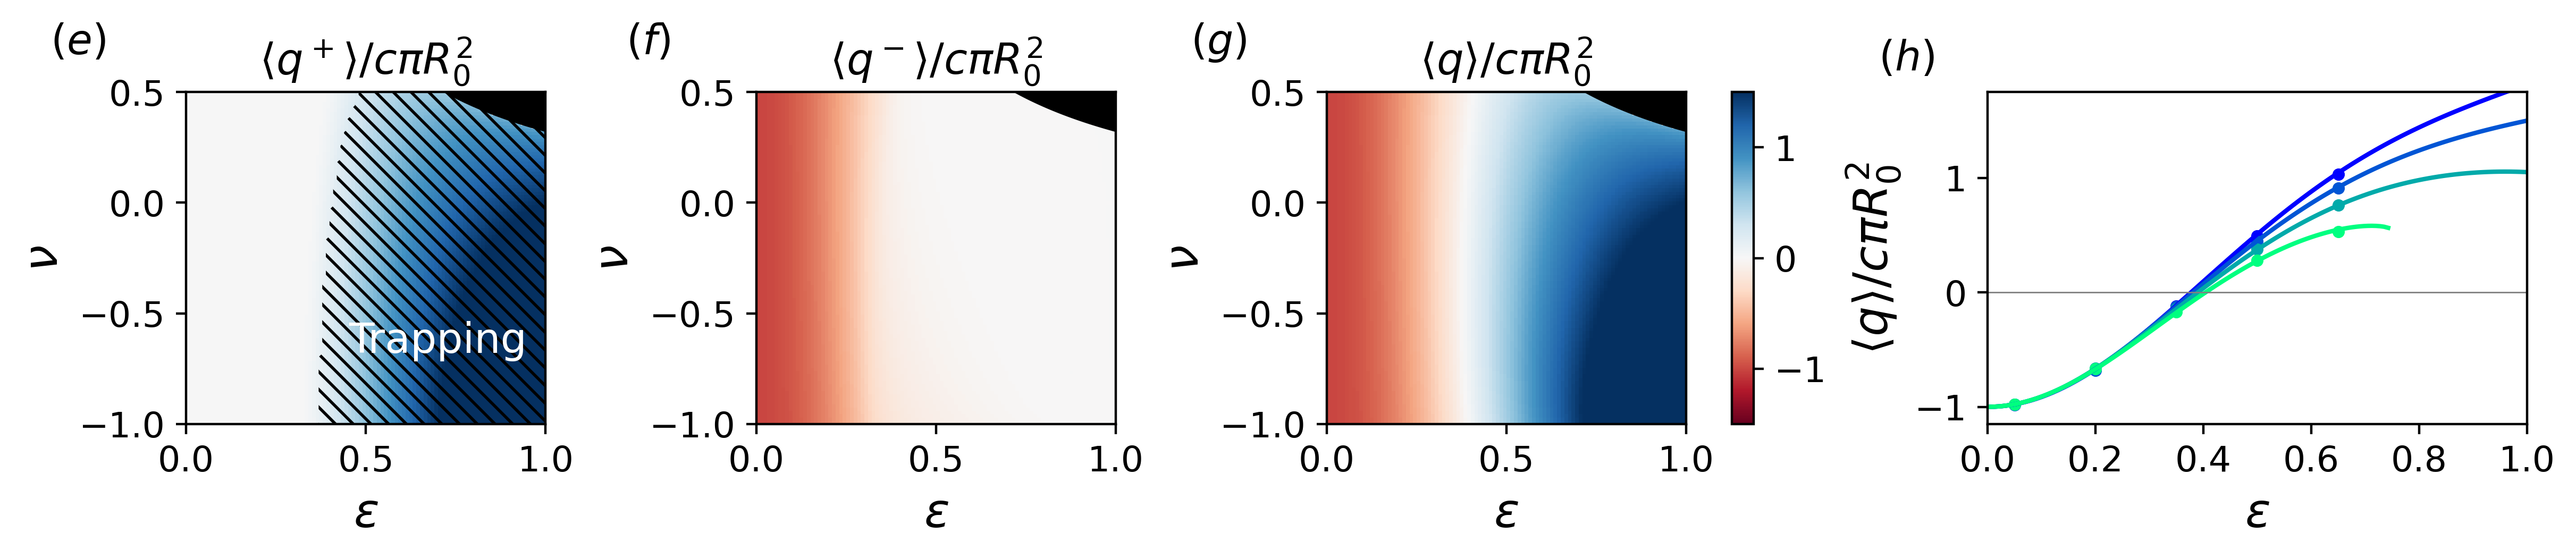

In [554]:
DP = 1
eta_min, eta_max = 0.0001, .9999
nu_min,  nu_max  = -1.0, 0.5
lenList = 100
etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
nuList  = np.linspace(-1, .5,  lenList, endpoint=True)


fig, axs = plt.subplots(1,5,figsize=(12, 2.5), dpi=400, constrained_layout=True, gridspec_kw={'width_ratios': [1, 1, 1, 0.06, 1.5]} )

letters = [r'$(e)$',r'$(f)$',r'$(g)$']
titles = [r"$\langle q^+ \rangle / c\pi R_0^2$", r"$\langle q^- \rangle / c\pi R_0^2$", r"$\langle q \rangle / c\pi R_0^2$"]
data = [qPlusMeanMatrix2, qMinusMeanMatrix2, qMeanMatrix2]

EE, NN = np.meshgrid(etaList, nuList)
invalid_region = (NN > 1/(EE**2+2*EE)).astype(float)
#maxData = np.nanmax(data) #around 2.5, this highlights that unphysical region near nu=-1, eta=1 
maxData = 1.5 #This is the normal max value, that of nu=0
fs = 12

for i in range(3):
    ax = axs[i]
    Z = data[i]
    im = ax.imshow(Z,
                   origin="lower",
                   cmap="RdBu",
                   norm=mpl.colors.TwoSlopeNorm(vmin=-maxData, vcenter=0.0, vmax=maxData),
                   extent=[0, 1, nu_min, nu_max],
                   aspect="auto",
                   )
    ax.set_xlabel(r"$\epsilon$", fontsize=16)
    ax.set_ylabel(r"$\nu$", fontsize=16)
    ax.set_title(titles[i])
    ax.set_xlim(0,1)
    ax.set_ylim(-1,.5)
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.text(-.3, 1.15, letters[i], fontsize=14, ha='center', va='center', transform=ax.transAxes)
    
    #Color the invalid region white
    ax.contourf(EE, NN, invalid_region, levels=[0.5, 1.5], colors='black', zorder=100)
    ax.plot(etaList, 1/(etaList*(etaList+2)),color='black',linewidth=2,linestyle='-', zorder=1000)

#Hatch the zero reflux region
axs[1].contourf(EE, NN, 1-(refluxStatMatrix2), levels=[0.5, 1.5], colors='none', hatches=['////'], zorder=10)
# and the trapping region
axs[0].contourf(EE, NN, (trappingStatMatrix2), levels=[0.5, 1.5], colors='none', hatches=['\\\\\\\\'], zorder=10)

cbar = fig.colorbar(im, cax=axs[3])
#fig.colorbar(im, cax=axs[3])
cbar.ax.tick_params(labelsize=fs)

ax=axs[0]
ax.text(.7, .25, r'Trapping', color='white',fontsize=14, ha='center', va='center', transform=ax.transAxes,zorder=100)
#ax=axs[1]
#ax.text(.5, .84, r'No Reflux', color='black',fontsize=14, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white', alpha=.8), transform=ax.transAxes, zorder=100)

ax=axs[4]
nuListCOMSOL = [-.25,0,0.25,.49]

cmap = plt.get_cmap('winter')
size = 10

for i in range(len(nuListCOMSOL)):
    nu = nuListCOMSOL[i]
    if nu > 0:
        etaMax = min(.999, np.sqrt(1+1/nu) - 1.001)
    else:
        etaMax = .999
    etaListCorrected = np.linspace(0,etaMax,len(etaList))
    flowList = np.zeros(lenList)
    for j in range(len(etaListCorrected)):
        eta = etaListCorrected[j]
        flowList[j] = qMeanHoop(DP, eta, nu)
    color = cmap(i / (len(nuListCOMSOL) - 1))
    ax.plot(etaListCorrected, flowList, color=color, label=r'$\nu = $ %1.2f' %nu)

    for k in range(len(nuData)):
        if (nuData[k] - nu)**2 < 1e-6:
            ax.scatter(etaData[k],qData2[k], color=color, s=size)

ax.set_xlabel(r'$\epsilon$',fontsize=16)
ax.set_ylabel(r'$\langle q \rangle / c\pi R_0^2$',fontsize=16)
ax.set_xlim(0,1)
ax.set_ylim(-1.15,1.75)
#ax.legend(ncols=2,fontsize=10,framealpha=0.95)
ax.text(-.15, 1.1, r'$(h)$', fontsize=14, ha='center', va='center', transform=ax.transAxes)
ax.axhline(y=0, color='gray', linestyle='-',linewidth=.5)

#fig.suptitle(r'$\frac{u_r}{R_0} = \epsilon \sin(2\pi \xi/\lambda)$, $\sigma_{XX}=0$, $\Delta \bar{p}_\lambda = 1$',fontsize=20,y=1.2)

plt.show()

fig.savefig('qPlusRadialWithPressureWithCOMSOL.pdf', format='pdf', bbox_inches='tight')
fig.savefig('qPlusRadialWithPressureWithCOMSOL.svg', format='svg', bbox_inches='tight')

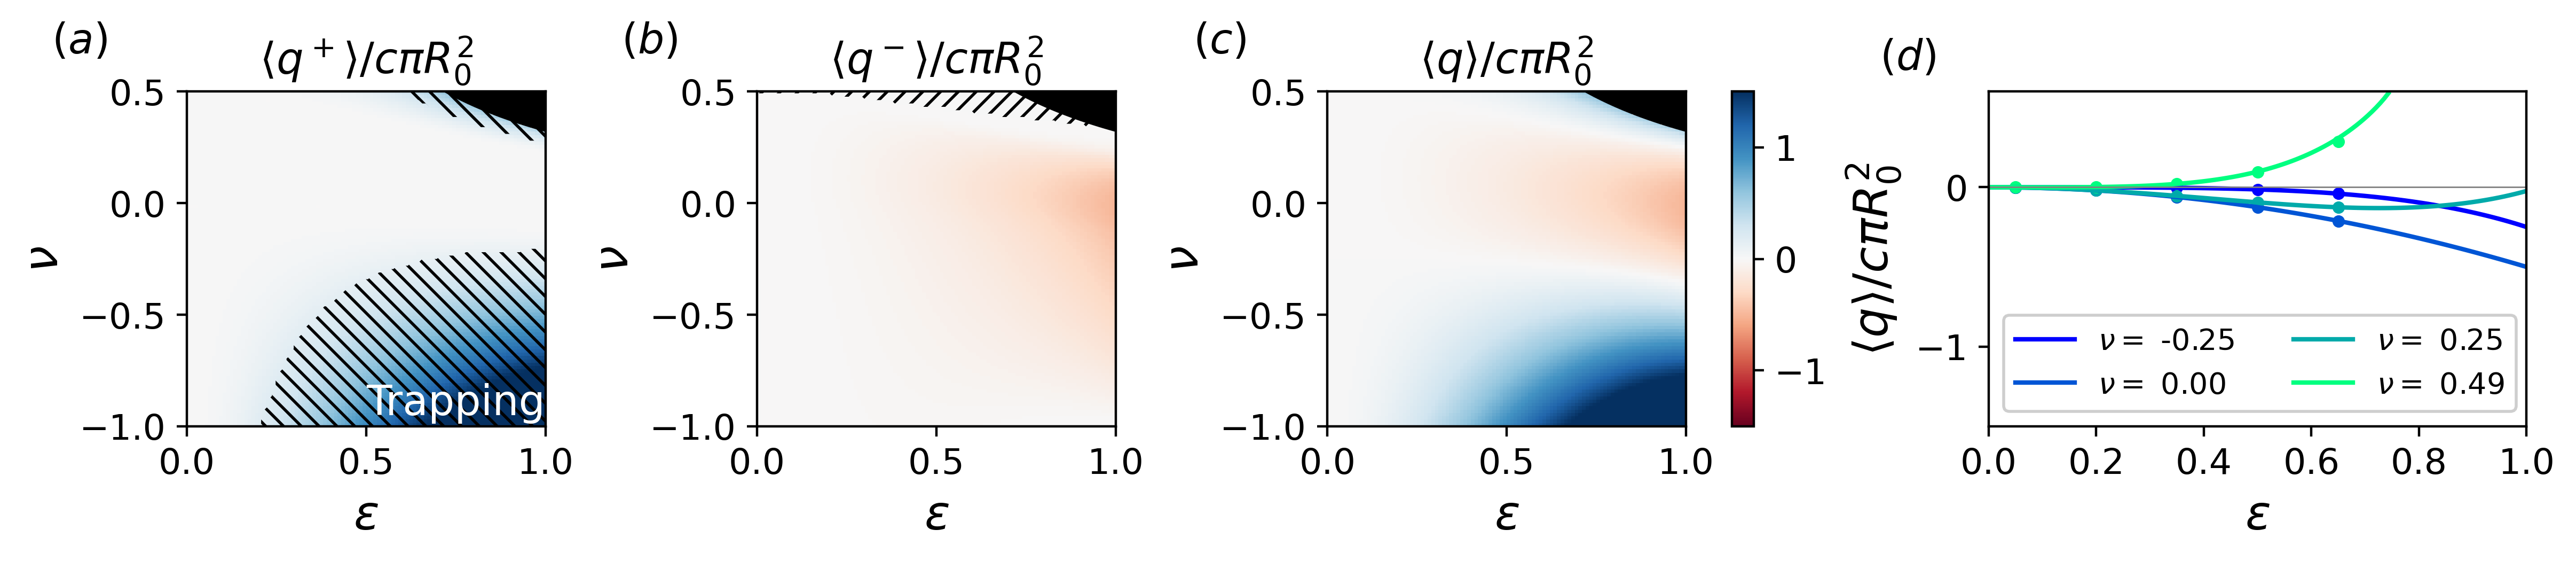

In [555]:
DP = 0
eta_min, eta_max = 0.0001, .9999
nu_min,  nu_max  = -1.0, 0.5
lenList = 100
etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
nuList  = np.linspace(-1, .5,  lenList, endpoint=True)


fig, axs = plt.subplots(1,5,figsize=(12, 2.5), dpi=400, constrained_layout=True, gridspec_kw={'width_ratios': [1, 1, 1, 0.06, 1.5]} )

letters = [r'$(a)$',r'$(b)$',r'$(c)$']
titles = [r"$\langle q^+ \rangle / c\pi R_0^2$", r"$\langle q^- \rangle / c\pi R_0^2$", r"$\langle q \rangle / c\pi R_0^2$"]
data = [qPlusMeanMatrixL, qMinusMeanMatrixL, qMeanMatrixL]

EE, NN = np.meshgrid(etaList, nuList)
invalid_region = (NN > 1/(EE**2+2*EE)).astype(float)
#maxData = np.nanmax(data) #around 2.5, this highlights that unphysical region near nu=-1, eta=1 
maxData = 1.5 #This is the normal max value, that of nu=0
fs = 12

for i in range(3):
    ax = axs[i]
    Z = data[i]
    im = ax.imshow(Z,
                   origin="lower",
                   cmap="RdBu",
                   norm=mpl.colors.TwoSlopeNorm(vmin=-maxData, vcenter=0.0, vmax=maxData),
                   extent=[0, 1, nu_min, nu_max],
                   aspect="auto",
                   )
    ax.set_xlabel(r"$\epsilon$", fontsize=16)
    ax.set_ylabel(r"$\nu$", fontsize=16)
    ax.set_title(titles[i])
    ax.set_xlim(0,1)
    ax.set_ylim(-1,.5)
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.text(-.3, 1.15, letters[i], fontsize=14, ha='center', va='center', transform=ax.transAxes)
    
    #Color the invalid region white
    ax.contourf(EE, NN, invalid_region, levels=[0.5, 1.5], colors='black', zorder=100)
    ax.plot(etaList, 1/(etaList*(etaList+2)),color='black',linewidth=2,linestyle='-', zorder=1000)

#Hatch the zero reflux region
axs[1].contourf(EE, NN, 1-(refluxStatMatrixL), levels=[0.5, 1.5], colors='none', hatches=['////'], zorder=10)
# and the trapping region
axs[0].contourf(EE, NN, (trappingStatMatrixL), levels=[0.5, 1.5], colors='none', hatches=['\\\\\\\\'], zorder=10)

cbar = fig.colorbar(im, cax=axs[3])
#fig.colorbar(im, cax=axs[3])
cbar.ax.tick_params(labelsize=fs)

ax=axs[0]
ax.text(.75, .07, r'Trapping', color='white',fontsize=14, ha='center', va='center', transform=ax.transAxes,zorder=100)
#ax=axs[1]
#ax.text(.5, .84, r'No Reflux', color='black',fontsize=14, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white', alpha=.8), transform=ax.transAxes, zorder=100)

ax=axs[4]
nuListCOMSOL = [-.25,0,0.25,.49]

cmap = plt.get_cmap('winter')
size = 10

for i in range(len(nuListCOMSOL)):
    nu = nuListCOMSOL[i]
    if nu > 0:
        etaMax = min(.999, np.sqrt(1+1/nu) - 1.001)
    else:
        etaMax = .999
    etaListCorrected = np.linspace(0,etaMax,len(etaList))
    flowList = np.zeros(lenList)
    for j in range(len(etaListCorrected)):
        eta = etaListCorrected[j]
        flowList[j] = qMeanTension(DP, eta, nu)
    color = cmap(i / (len(nuListCOMSOL) - 1))
    ax.plot(etaListCorrected, flowList, color=color, label=r'$\nu = $ %1.2f' %nu)

    for k in range(len(nuData)):
        if (nuDataL[k] - nu)**2 < 1e-6:
            ax.scatter(etaDataL[k],qDataL[k], color=color, s=size)

ax.set_xlabel(r'$\epsilon$',fontsize=16)
ax.set_ylabel(r'$\langle q \rangle / c\pi R_0^2$',fontsize=16)
ax.set_xlim(0,1)
ax.set_ylim(-1.5,.6)
ax.legend(ncols=2,fontsize=10,framealpha=0.95)
ax.text(-.15, 1.1, r'$(d)$', fontsize=14, ha='center', va='center', transform=ax.transAxes)
ax.axhline(y=0, color='gray', linestyle='-',linewidth=.5)

#fig.suptitle(r'$\frac{\partial u_x}{\partial X} = \epsilon \sin(2\pi \xi/\lambda)$, $\sigma_{\Phi \Phi}=0$, $\Delta \bar{p}_\lambda = 0$',fontsize=20,y=1.2)

plt.show()

fig.savefig('qPlusLongitudinalZeroPressureWithCOMSOL.pdf', format='pdf', bbox_inches='tight')
fig.savefig('qPlusLongitudinalZeroPressureWithCOMSOL.svg', format='svg', bbox_inches='tight')

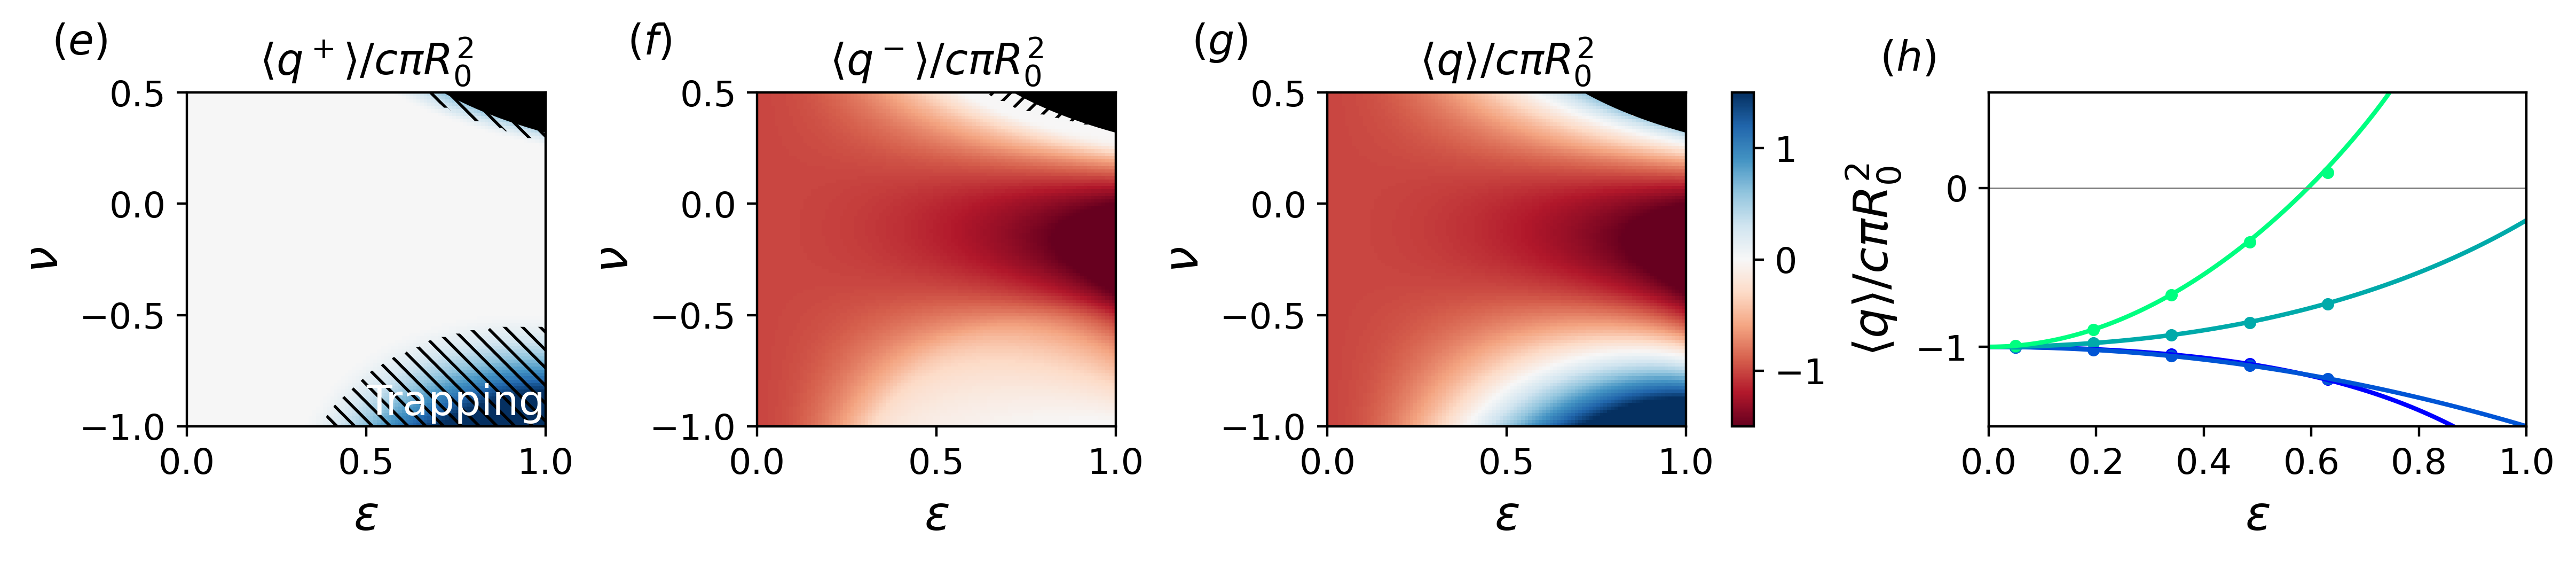

In [556]:
DP = 1
eta_min, eta_max = 0.0001, .9999
nu_min,  nu_max  = -1.0, 0.5
lenList = 100
etaList = np.linspace(eta_min, eta_max, lenList, endpoint=True)
nuList  = np.linspace(-1, .5,  lenList, endpoint=True)


fig, axs = plt.subplots(1,5,figsize=(12, 2.5), dpi=400, constrained_layout=True, gridspec_kw={'width_ratios': [1, 1, 1, 0.06, 1.5]} )

letters = [r'$(e)$',r'$(f)$',r'$(g)$']
titles = [r"$\langle q^+ \rangle / c\pi R_0^2$", r"$\langle q^- \rangle / c\pi R_0^2$", r"$\langle q \rangle / c\pi R_0^2$"]
data = [qPlusMeanMatrix2L, qMinusMeanMatrix2L, qMeanMatrix2L]

EE, NN = np.meshgrid(etaList, nuList)
invalid_region = (NN > 1/(EE**2+2*EE)).astype(float)
#maxData = np.nanmax(data) #around 2.5, this highlights that unphysical region near nu=-1, eta=1 
maxData = 1.5 #This is the normal max value, that of nu=0
fs = 12

for i in range(3):
    ax = axs[i]
    Z = data[i]
    im = ax.imshow(Z,
                   origin="lower",
                   cmap="RdBu",
                   norm=mpl.colors.TwoSlopeNorm(vmin=-maxData, vcenter=0.0, vmax=maxData),
                   extent=[0, 1, nu_min, nu_max],
                   aspect="auto",
                   )
    ax.set_xlabel(r"$\epsilon$", fontsize=16)
    ax.set_ylabel(r"$\nu$", fontsize=16)
    ax.set_title(titles[i])
    ax.set_xlim(0,1)
    ax.set_ylim(-1,.5)
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.text(-.3, 1.15, letters[i], fontsize=14, ha='center', va='center', transform=ax.transAxes)
    
    #Color the invalid region white
    ax.contourf(EE, NN, invalid_region, levels=[0.5, 1.5], colors='black', zorder=100)
    ax.plot(etaList, 1/(etaList*(etaList+2)),color='black',linewidth=2,linestyle='-', zorder=1000)

#Hatch the zero reflux region
axs[1].contourf(EE, NN, 1-(refluxStatMatrix2L), levels=[0.5, 1.5], colors='none', hatches=['////'], zorder=10)
# and the trapping region
axs[0].contourf(EE, NN, (trappingStatMatrix2L), levels=[0.5, 1.5], colors='none', hatches=['\\\\\\\\'], zorder=10)

cbar = fig.colorbar(im, cax=axs[3])
cbar.ax.tick_params(labelsize=fs)

ax=axs[0]
ax.text(.75, .07, r'Trapping', color='white',fontsize=14, ha='center', va='center', transform=ax.transAxes,zorder=100)

ax=axs[4]
nuListCOMSOL = [-.25,0,0.25,.49]

cmap = plt.get_cmap('winter')
size = 10

for i in range(len(nuListCOMSOL)):
    nu = nuListCOMSOL[i]
    if nu > 0:
        etaMax = min(.999, np.sqrt(1+1/nu) - 1.001)
    else:
        etaMax = .999
    etaListCorrected = np.linspace(0,etaMax,len(etaList))
    flowList = np.zeros(lenList)
    for j in range(len(etaListCorrected)):
        eta = etaListCorrected[j]
        flowList[j] = qMeanTension(DP, eta, nu)
    color = cmap(i / (len(nuListCOMSOL) - 1))
    ax.plot(etaListCorrected, flowList, color=color, label=r'$\nu = $ %1.2f' %nu)

    for k in range(len(nuData)):
        if (nuData2L[k] - nu)**2 < 1e-6:
            ax.scatter(etaData2L[k],qData2L[k], color=color, s=size)

ax.set_xlabel(r'$\epsilon$',fontsize=16)
ax.set_ylabel(r'$\langle q \rangle / c\pi R_0^2$',fontsize=16)
ax.set_xlim(0,1)
ax.set_ylim(-1.5,.6)
ax.text(-.15, 1.1, r'$(h)$', fontsize=14, ha='center', va='center', transform=ax.transAxes)
ax.axhline(y=0, color='gray', linestyle='-',linewidth=.5)

plt.show()

fig.savefig('qPlusLongitudinalWithPressureWithCOMSOL.pdf', format='pdf', bbox_inches='tight')
fig.savefig('qPlusLongitudinalWithPressureWithCOMSOL.svg', format='svg', bbox_inches='tight')